<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/tf_ImageDataGenerator_flowfrom_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Tutorial on Keras ImageDataGenerator with flow_from_dataframe](https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/tdata.zip" .

Mounted at /content/drive


In [ ]:
temp_dir = './temp'
train_dir = temp_dir + "/tdata/train"
test_dir = temp_dir + "/tdata/test"

In [ ]:
import shutil
import os

if os.path.isdir(temp_dir):
  shutil.rmtree(temp_dir)

In [ ]:
import shutil
import zipfile
shutil.unpack_archive('tdata.zip', temp_dir)

In [ ]:
import pandas as pd
df = pd.read_csv(temp_dir+"/tdata/train.csv")

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, # 255で割ることで正規化
                                   zoom_range=0.2, # ランダムにズーム
                                   horizontal_flip = True, # 水平反転
                                   rotation_range = 20, # ランダムに回転
                                   vertical_flip = False, # 垂直反転
                                   featurewise_std_normalization=True,
                                   validation_split = 0.2
                                   )

valid_datagen = ImageDataGenerator(rescale=1./255)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [12]:
df['gender_status'] = df['gender_status'].astype(str)
train_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory=train_dir,
                                                    x_col="image",
                                                    y_col="gender_status",
                                                    class_mode='categorical',
                                                    target_size=(256,256),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    subset = "training")

train_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory=train_dir,
                                                    x_col="image",
                                                    y_col="gender_status",
                                                    class_mode='categorical',
                                                    target_size=(256,256),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    subset = "validation")

Found 3391 validated image filenames belonging to 8 classes.
Found 847 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


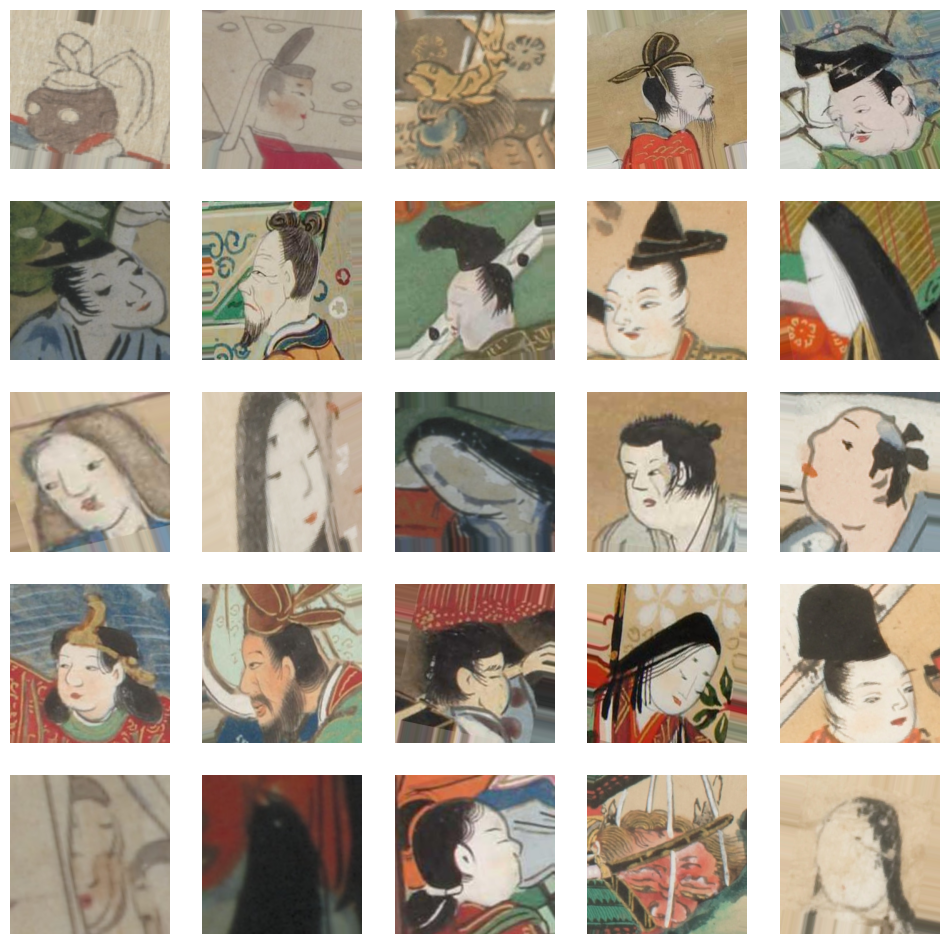

In [ ]:
import matplotlib.pyplot as plt
# 1バッチ分取り出す(64個の画像）
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.axis('off')

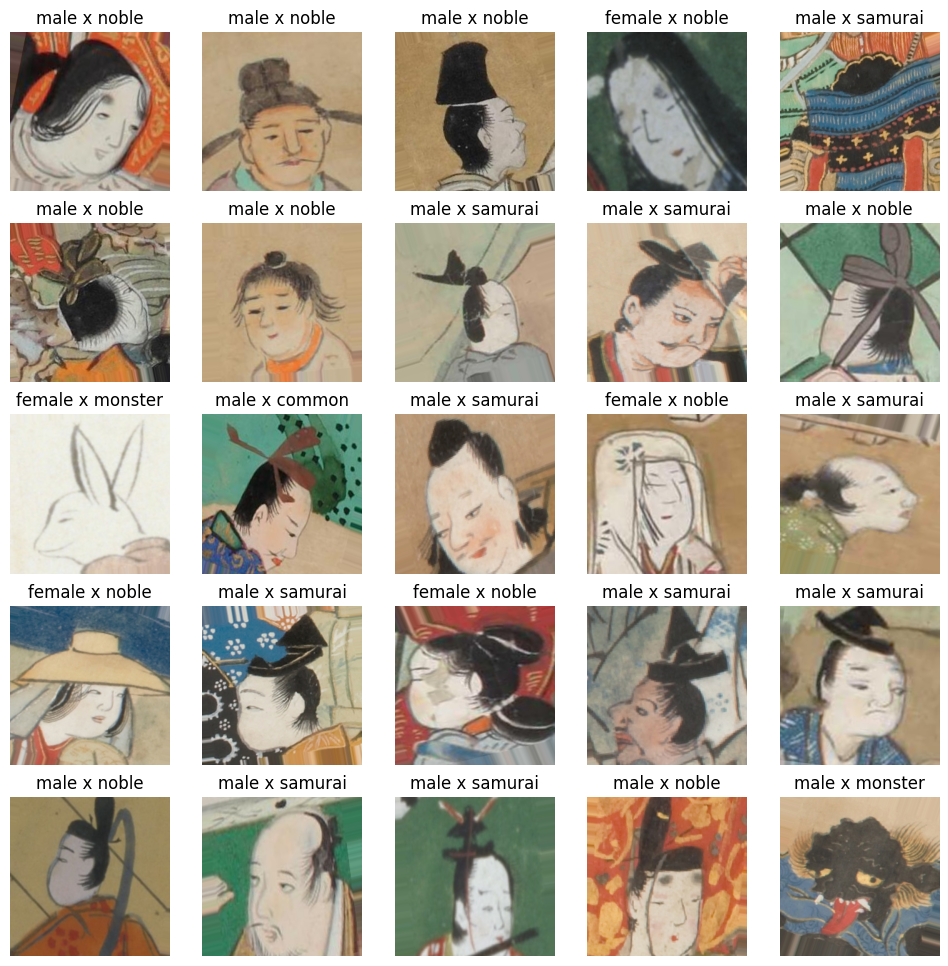

In [ ]:
import numpy as np
# indexからラベル名に戻すための辞書を定義
index2label_dict = {
    0 : 'male x noble',
    1 : 'male x samurai',
    2 : 'male x monster',
    3 : 'male x common',
    4 : 'female x noble',
    5 : 'femele x samurai',
    6 : 'female x monster',
    7 : 'female x common'
}

items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    label_index = np.argmax(items[1][i-1])
    label_name = index2label_dict[label_index]
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.title(label_name)
    plt.axis('off')